In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [9]:
sample = 'IPIHNSC069'
df = pd.read_csv(f"/media/austin/DrosophilaMelanogaster/IPI/8plex/analysis/05_complete/{sample}/cell_table_arcsinh_transformed_stitched_gated_tumorannotated.csv")

savedir = Path("/media/austin/DrosophilaMelanogaster/IPI/8plex/analysis/cell_frequency_plots")

try:
    Path(savedir, sample).mkdir()
except FileExistsError:
    pass

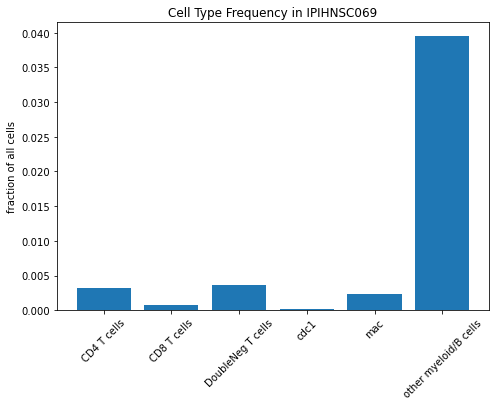

In [10]:
cell_types = list(np.unique(df['cell_type'].values))

cell_types.remove('other')
total_cells = len(df)

data = []

for ct in cell_types:

    n_cells = sum(df['cell_type']==ct)
    frac = n_cells/total_cells
    data.append(frac)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cell_types, data)
plt.ylabel('fraction of all cells')
plt.title(f'Cell Type Frequency in {sample}')
plt.xticks(rotation=45)

plt.savefig(Path(savedir,sample,f"{sample}_frequency.png"),bbox_inches='tight',facecolor=[1,1,1])

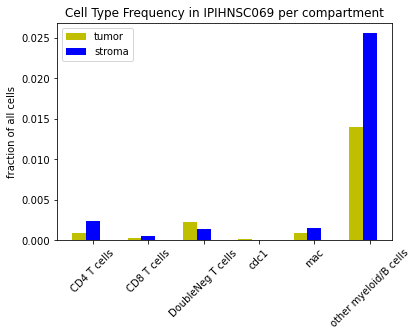

In [11]:
total_cells = len(df)

tumor = []
stroma = []

for ct in cell_types:

    n_in_tumor = sum((df['cell_type']==ct) & (df['in_tumor']==1))
    tum_frac = n_in_tumor/total_cells
    tumor.append(tum_frac)
    
    n_in_stroma = sum((df['cell_type']==ct) & (df['in_tumor']==0))
    stromal_frac = n_in_stroma/total_cells
    stroma.append(stromal_frac)

data = [tumor, stroma]

fig = plt.subplots()
bar_width = 0.25

br1 = np.arange(len(cell_types))
br2 = [x + bar_width for x in br1]

plt.bar(br1,data[0], color='y', width=0.25,label='tumor')
plt.bar(br2,data[1], color='b', width=0.25,label='stroma')

plt.ylabel('fraction of all cells')
plt.legend(['tumor', 'stroma'])
plt.xticks([r + bar_width for r in range(len(cell_types))],
        cell_types)
plt.title(f'Cell Type Frequency in {sample} per compartment')
plt.xticks(rotation=45)
plt.savefig(Path(savedir,sample,f"{sample}_frequency_tumor.png"),bbox_inches='tight',facecolor=[1,1,1])

In [5]:
cell_types

['CD4 T cells',
 'CD8 T cells',
 'DoubleNeg T cells',
 'cdc1',
 'mac',
 'other myeloid/B cells']